# Task 2: Loan Approval Prediction

**Description:**  
Build a predictive model to determine whether a loan application will be approved.  
Use the recommended dataset: *Loan-Approval-Prediction-Dataset* (Kaggle).  

**Project Steps and Highlights:**  
- **Data Exploration:**  
  - Loaded data and examined structure using `info()`, `describe()`, `shape`, `columns`, `isna().sum()`, and duplicates check.  
  - Confirmed no missing values or duplicates.  
  - Detected and handled outliers; visualized with boxplots before and after treatment.  
  - Cleaned column names and ensured proper data types.  
  - Visualized distributions of numeric columns using histograms.  
  - Displayed value counts for categorical columns along with horizontal bar plots.  
  
- **Preprocessing:**  
  - Confirmed missing data absence again.  
  - Split features into categorical and numerical columns.  
  - Applied encoding on categorical variables.  
  - Scaled numerical features appropriately.  
  
- **Modeling (Before SMOTE):**  
  - Logistic Regression accuracy: **~87.2%**  
  - Decision Tree accuracy: **~97%**  
  
- **Modeling (After SMOTE for Imbalance Handling):**  
  - Logistic Regression accuracy: **~88.3%**  
  - Decision Tree accuracy: **~97.3%**  
  
- **Evaluation for each model:**  
  - Calculated precision, recall, and F1-score (focus on handling imbalanced data).  
  - Printed detailed classification reports and confusion matrices.  
  - Plotted confusion matrices for visual analysis.  
  
**Tools & Libraries Used:**  
Python, Pandas, Scikit-learn, Matplotlib/Seaborn, Imbalanced-learn (SMOTE)

---

*This notebook documents the full pipeline from exploratory data analysis, preprocessing, model building, to evaluation focusing on imbalanced binary classification.*


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [20]:
df.shape

(4269, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [23]:
df.describe(include='object').T

,count,unique,top,freq
education,4269,2,Graduate,2144
self_employed,4269,2,Yes,2150
loan_status,4269,2,Approved,2656


In [24]:
df.columns = df.columns.str.strip()

In [25]:
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
num_col = df.select_dtypes(include = ['int','float']).columns
num_col

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

Outliers after handling:  0



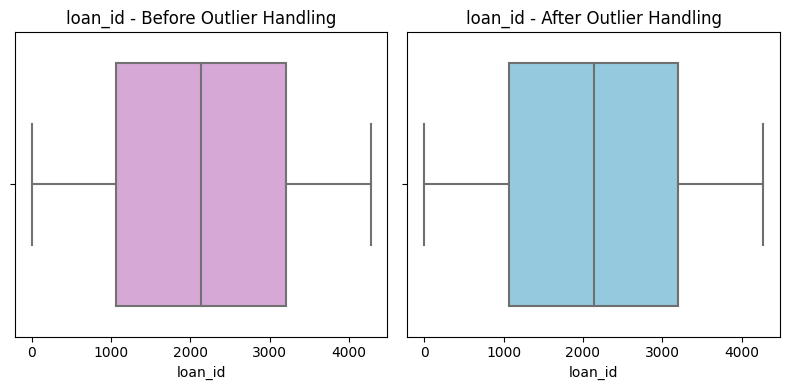

Outliers after handling:  0



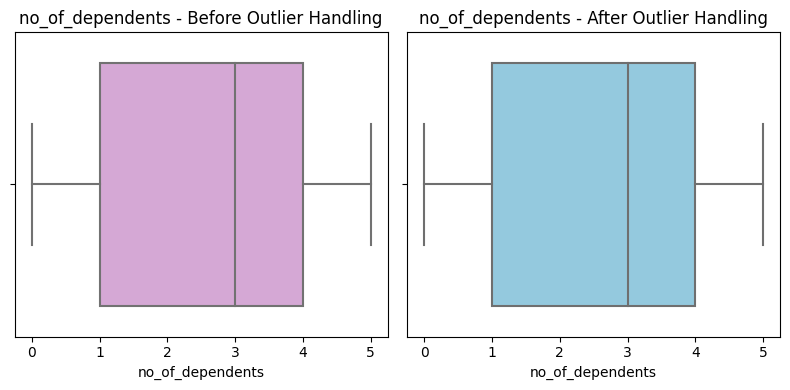

Outliers after handling:  0



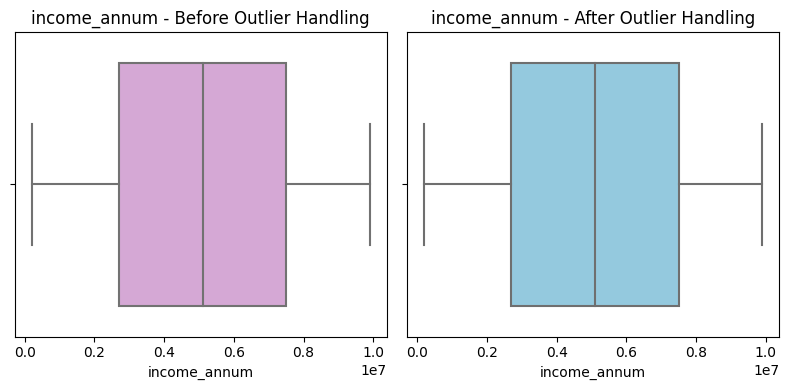

Outliers after handling:  0



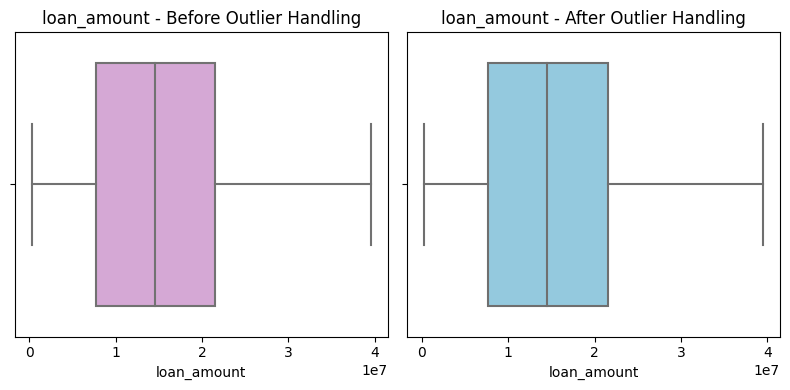

Outliers after handling:  0



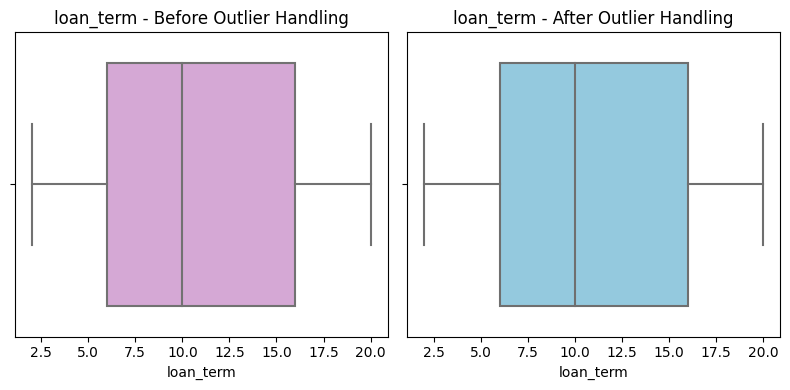

Outliers after handling:  0



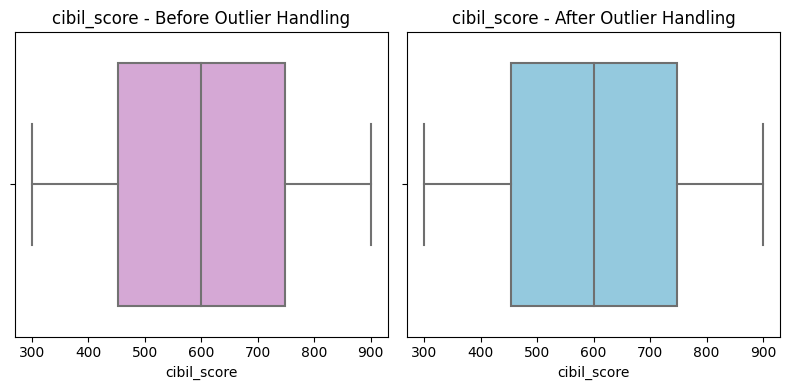

Outliers after handling:  0



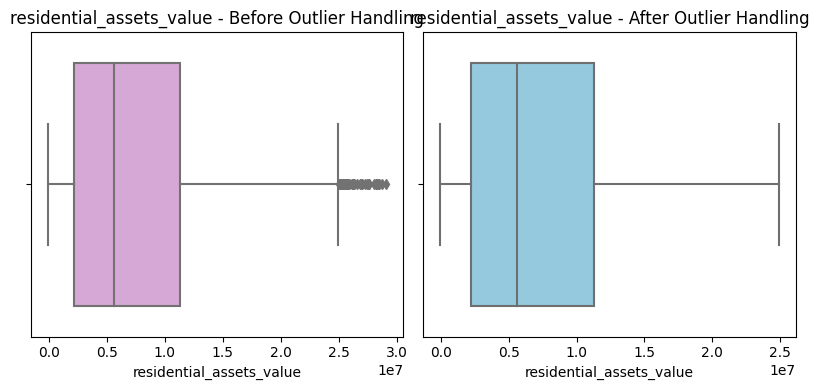

Outliers after handling:  0



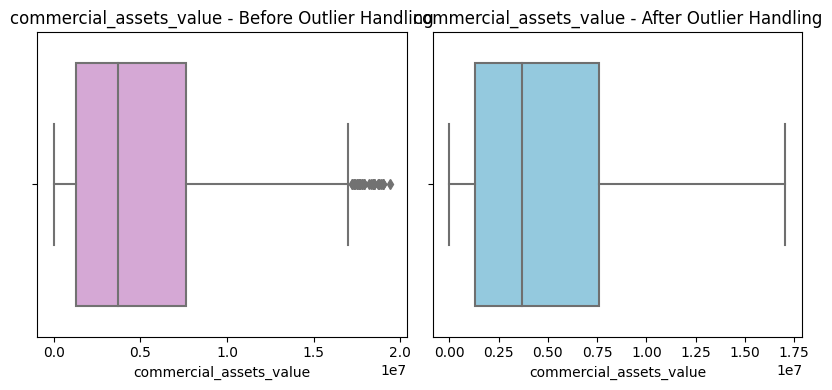

Outliers after handling:  0



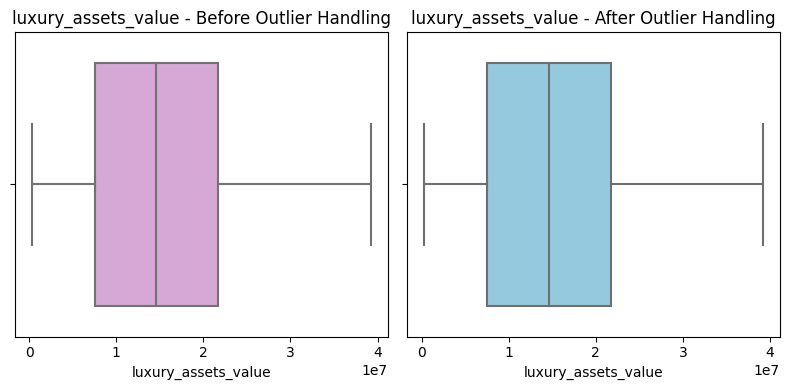

Outliers after handling:  0



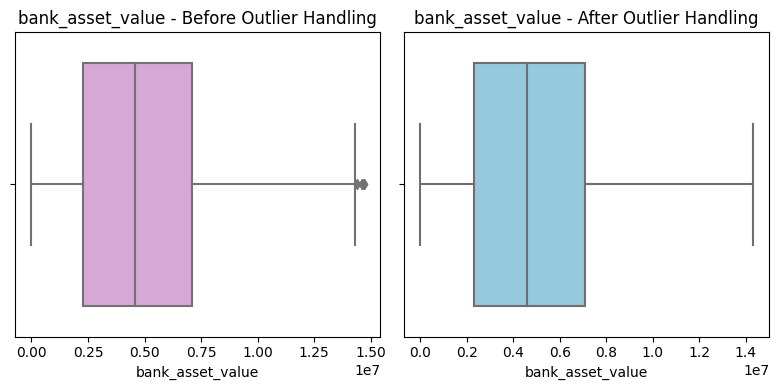

In [28]:
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # before handling outliers
    Outliers_before = df[(df[col] < lower) | (df[col] > upper)]
    count_before = len(Outliers_before)
    
    # copy of the column before capping to plot
    col_before = df[col].copy()
    
    # handle outliers by capping
    df.loc[df[col] > upper, col] = upper
    df.loc[df[col] < lower, col] = lower
    
    # After handling outliers
    Outliers_after = df[(df[col] < lower) | (df[col] > upper)]
    count_after = len(Outliers_after)
    print(f"Outliers after handling:  {count_after}")
    print("="*50 + "\n")
    
    # plot before and after handling  
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    
    sns.boxplot(x=col_before, ax=axes[0],color = 'plum')
    axes[0].set_title(f"{col} - Before Outlier Handling")
    
    sns.boxplot(x=df[col], ax=axes[1],color = 'skyblue')
    axes[1].set_title(f"{col} - After Outlier Handling")
    
    plt.tight_layout()
    plt.show()


In [29]:
df.shape

(4269, 13)

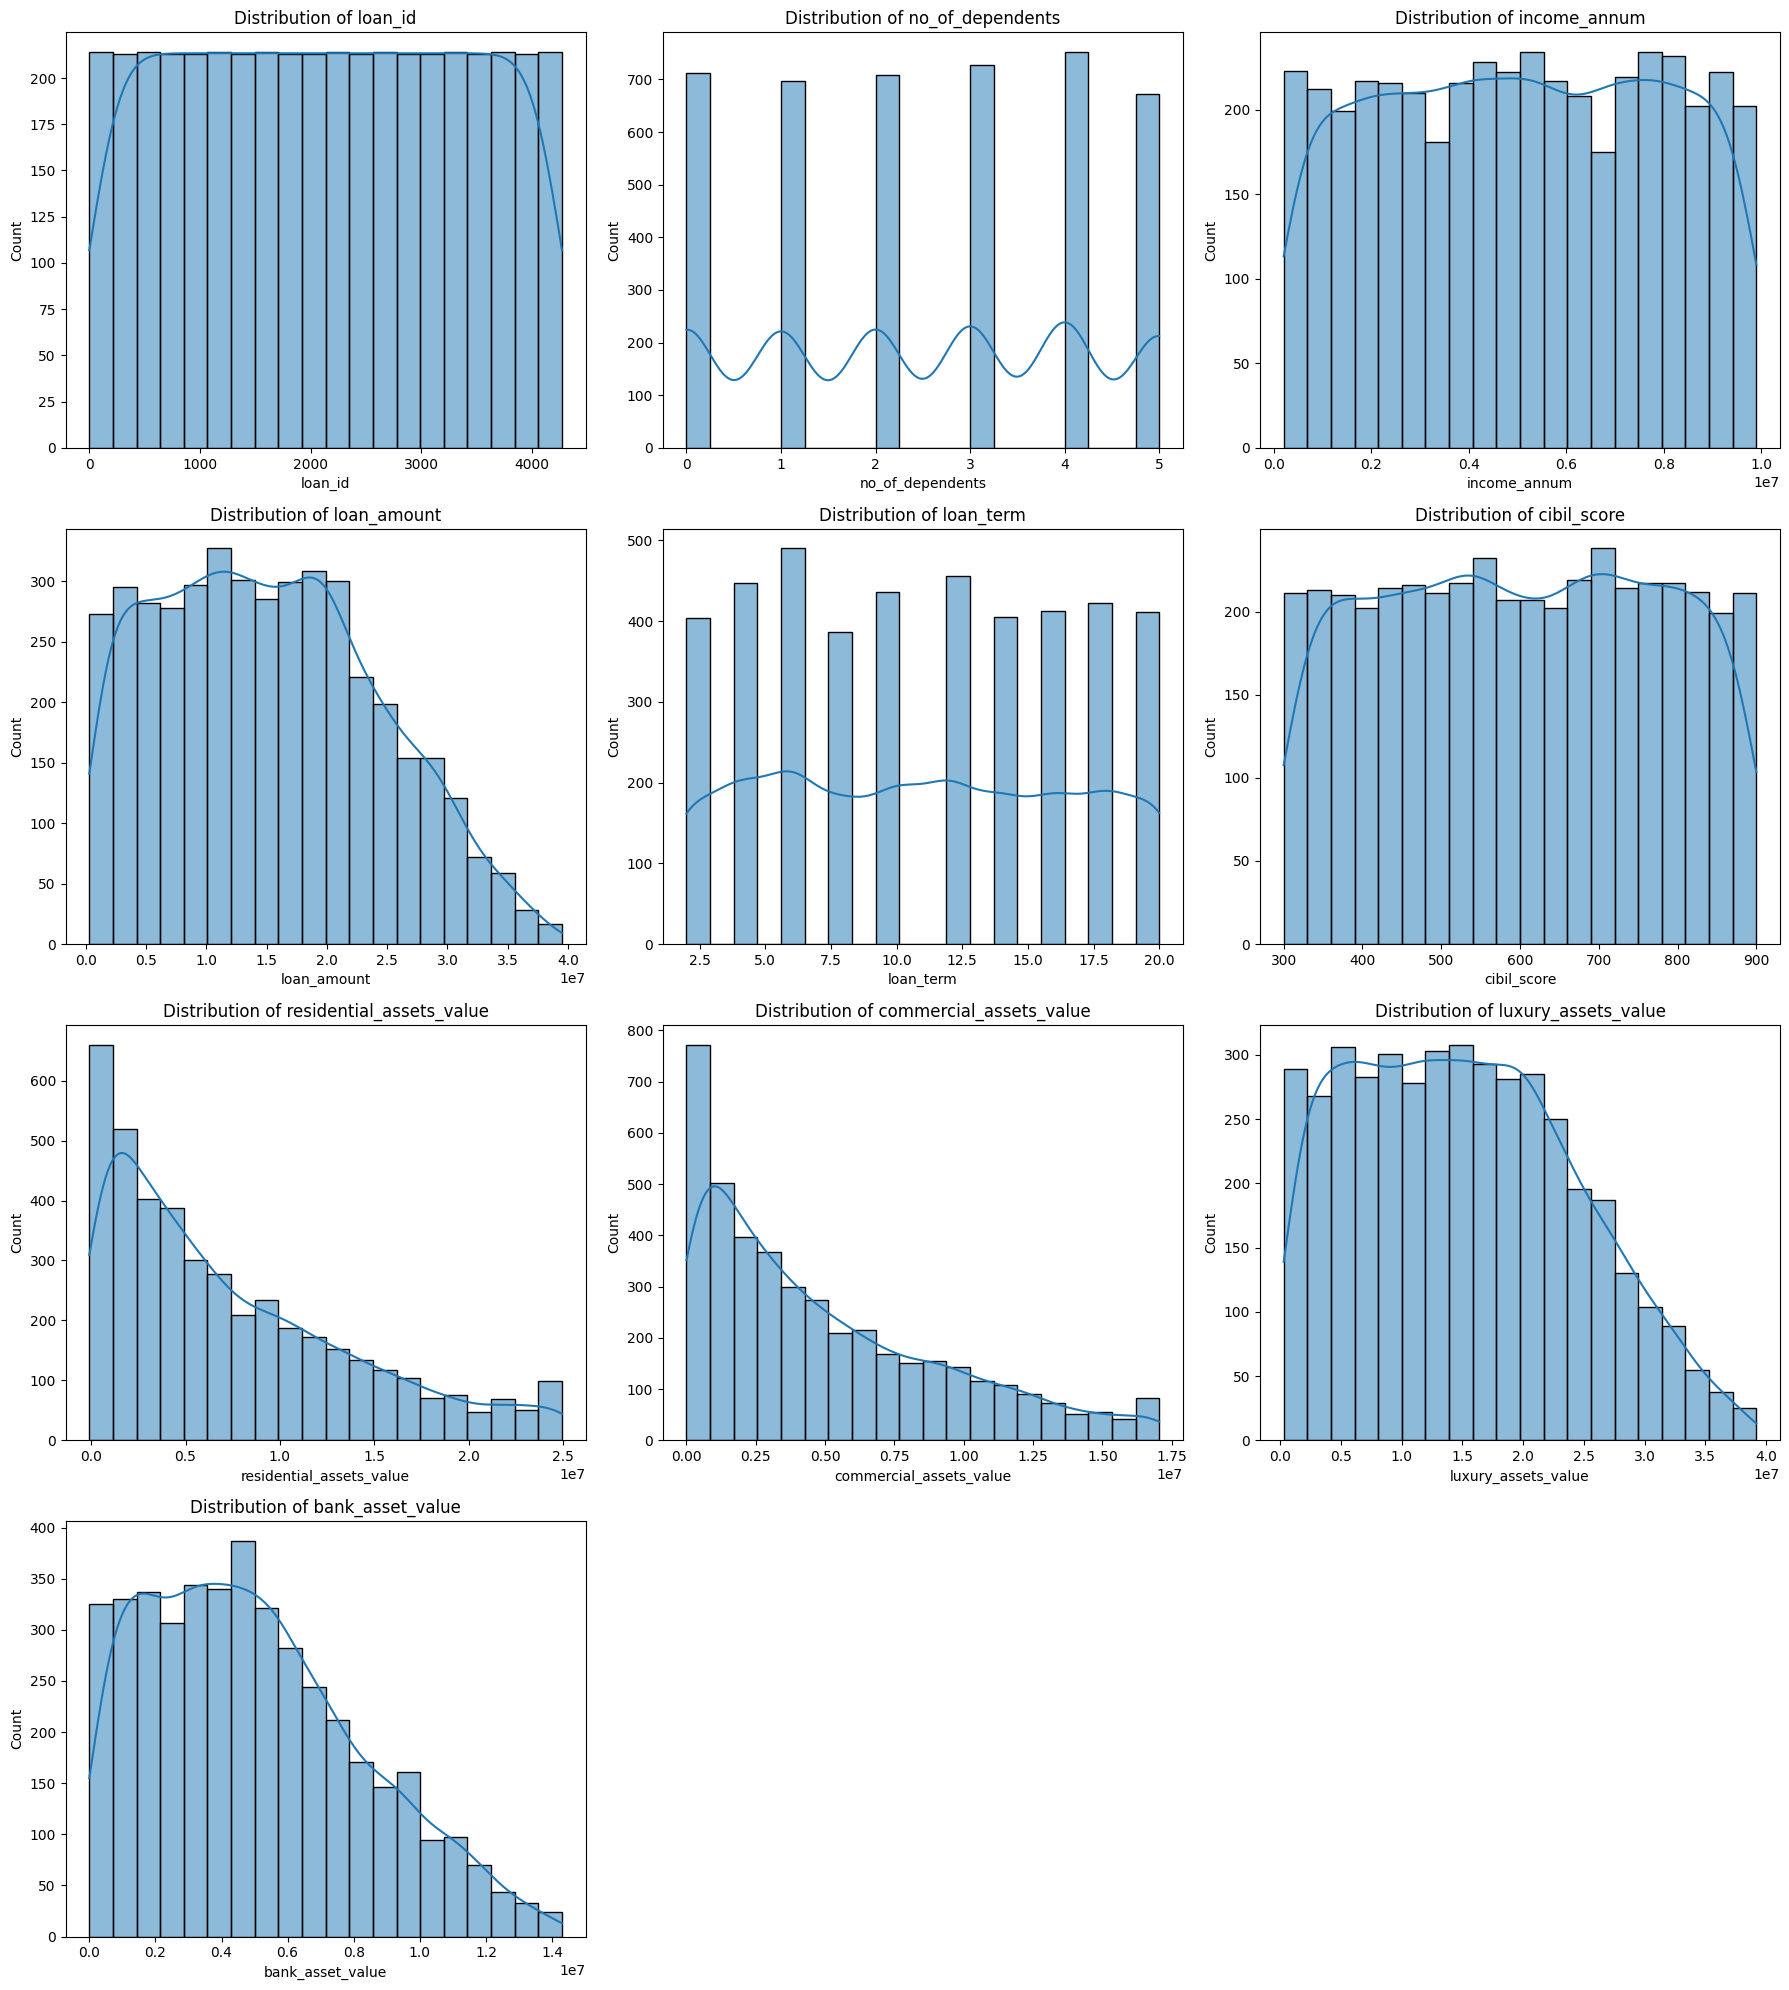

In [30]:
cols_per_row = 3
rows = -(-len(num_col) // cols_per_row)  

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 5 * rows))

# Flatten axes in case of single row
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(data=df, x=col, bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [31]:
cat_col = df.select_dtypes(include = 'object')

Value counts for column: education
education
Not Graduate    2125
Graduate        2144
Name: count, dtype: int64
----------------------------------------


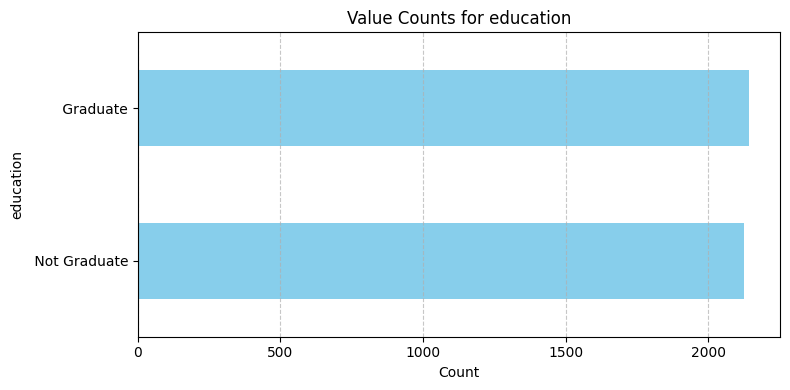

Value counts for column: self_employed
self_employed
No     2119
Yes    2150
Name: count, dtype: int64
----------------------------------------


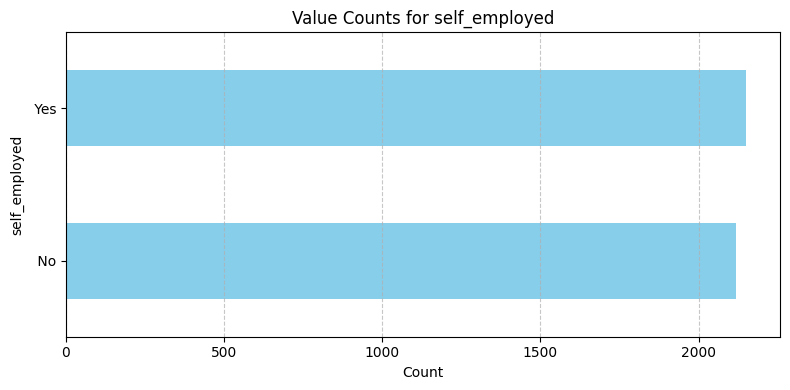

Value counts for column: loan_status
loan_status
Rejected    1613
Approved    2656
Name: count, dtype: int64
----------------------------------------


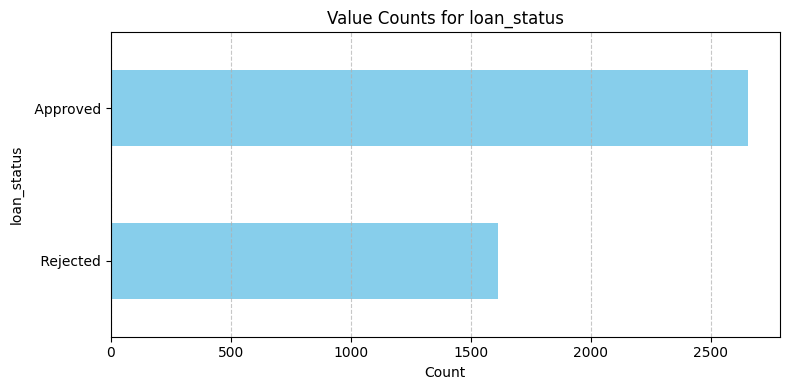

In [32]:
for col in cat_col:
    print(f"Value counts for column: {col}")
    counts = df[col].value_counts().sort_values()
    print(counts)
    print("-" * 40)  

    plt.figure(figsize=(8, 4))
    counts.plot(kind='barh', color='skyblue')
    plt.title(f'Value Counts for {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show() 

In [33]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [34]:
df['self_employed'] = df['self_employed'].astype(str).str.strip().str.capitalize()
print("Unique values before mapping:", df['self_employed'].unique())
df['self_employed'] = df['self_employed'].map({"Yes": True, "No": False})
print("Value counts after mapping:", df['self_employed'].value_counts())

Unique values before mapping: ['No' 'Yes']
Value counts after mapping: self_employed
True     2150
False    2119
Name: count, dtype: int64


In [35]:
cat_col.columns

Index(['education', 'self_employed', 'loan_status'], dtype='object')

In [36]:
num_col = df.select_dtypes(include=['int','float'])
num_col.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

# Preprocessing Stage

In [37]:
!pip install -U scikit-learn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 87.0 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # for handling imbalance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay# confusion matrix from scikit-learn 

In [39]:
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [40]:
df.dtypes

loan_id                       int64
no_of_dependents            float64
education                    object
self_employed                  bool
income_annum                  int64
loan_amount                   int64
loan_term                     int64
cibil_score                 float64
residential_assets_value      int64
commercial_assets_value       int64
luxury_assets_value           int64
bank_asset_value              int64
loan_status                  object
dtype: object

In [41]:
df.drop('loan_id',axis =1, inplace = True)

In [42]:
cat_col = ['education','loan_status']
num_col = df.select_dtypes(include=['int','float']).columns

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])


In [44]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2.0,0,False,9600000,29900000,12,778.0,2400000,17050000,22700000,8000000,0
1,0.0,1,True,4100000,12200000,8,417.0,2700000,2200000,8800000,3300000,1
2,3.0,0,False,9100000,29700000,20,506.0,7100000,4500000,33300000,12800000,1
3,3.0,0,False,8200000,30700000,8,467.0,18200000,3300000,23300000,7900000,1
4,5.0,1,True,9800000,24200000,20,382.0,12400000,8200000,29400000,5000000,1


In [45]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2.0,0,False,9600000,29900000,12,778.0,2400000,17050000,22700000,8000000,0
1,0.0,1,True,4100000,12200000,8,417.0,2700000,2200000,8800000,3300000,1
2,3.0,0,False,9100000,29700000,20,506.0,7100000,4500000,33300000,12800000,1
3,3.0,0,False,8200000,30700000,8,467.0,18200000,3300000,23300000,7900000,1
4,5.0,1,True,9800000,24200000,20,382.0,12400000,8200000,29400000,5000000,1


In [46]:
scaler= StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])

In [47]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-0.294102,0,False,1.617979,1.633052,0.192617,1.032792,-0.783495,2.770319,0.832028,0.930707,0
1,-1.473548,1,True,-0.341750,-0.324414,-0.508091,-1.061051,-0.736995,-0.633638,-0.694993,-0.515991,1
2,0.295621,0,False,1.439822,1.610933,1.594031,-0.544840,-0.055003,-0.106426,1.996520,2.408185,1
3,0.295621,0,False,1.119139,1.721525,-0.508091,-0.771045,1.665478,-0.381493,0.897943,0.899926,1
4,1.475067,1,True,1.689242,1.002681,1.594031,-1.264055,0.766488,0.741698,1.568075,0.007282,1


In [76]:
X = df.drop('loan_status',axis = 1)
y = df['loan_status']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 42)

In [77]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("===========================")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("===========================")
# Recall,Precision, f1_score,accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")



Confusion Matrix:
 [[498  38]
 [ 43 275]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

Precision: 0.879
Recall:    0.865
F1-score:  0.872


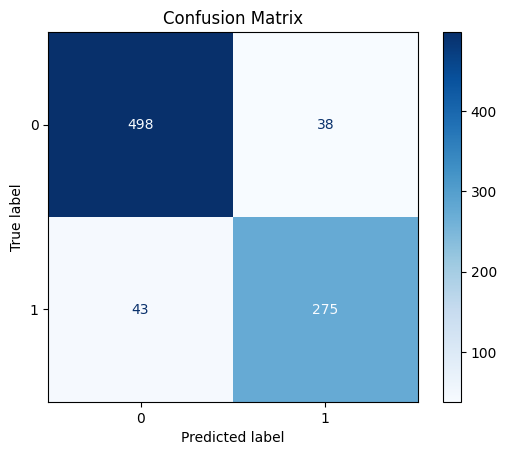

In [78]:
# confusion matrix from scikit-learn 
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues) 
plt.title("Confusion Matrix")
plt.show()


In [79]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("===========================")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("===========================")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")



Confusion Matrix:
 [[527   9]
 [ 10 308]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Precision: 0.972
Recall:    0.969
F1-score:  0.970


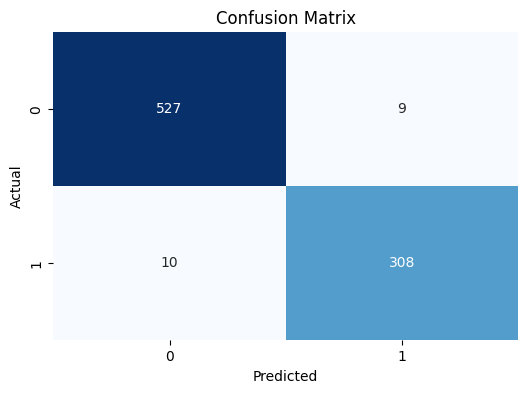

In [80]:
# confusion matrix using seaborn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [81]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [82]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)


print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("===========================")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("===========================")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")



Confusion Matrix:
 [[486  50]
 [ 27 291]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       536
           1       0.85      0.92      0.88       318

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.90       854
weighted avg       0.91      0.91      0.91       854

Precision: 0.853
Recall:    0.915
F1-score:  0.883


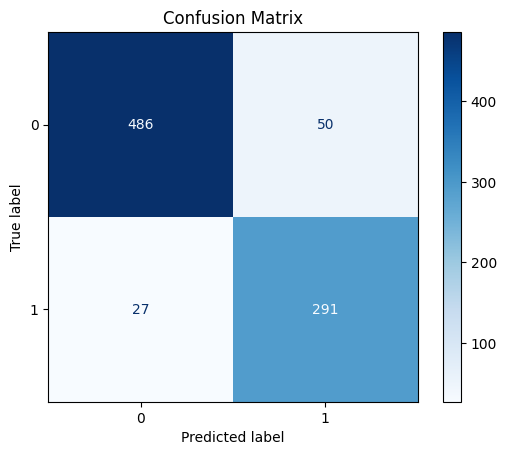

In [83]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues) 
plt.title("Confusion Matrix")
plt.show()


In [84]:
dt_model = DecisionTreeClassifier(max_depth=15,random_state=42)
dt_model.fit(X_train_res, y_train_res)
y_pred = dt_model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("==========================")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("==========================")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")



Confusion Matrix:
 [[528   8]
 [  9 309]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Precision: 0.975
Recall:    0.972
F1-score:  0.973


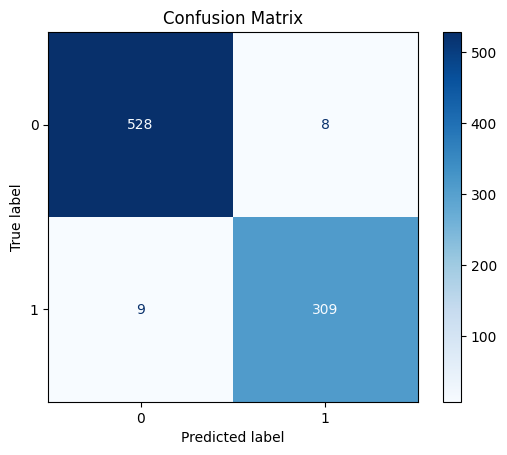

In [85]:
# confusion matrix from scikit-learn 
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues) 
plt.title("Confusion Matrix")
plt.show()
